In [109]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, classification_report, f1_score
from sklearn.linear_model import LogisticRegression
import joblib
from sklearn.metrics import roc_auc_score, roc_curve

In [110]:
import pandas as pd
df=pd.read_csv(r'/content/sample_data/vocal_gender_features_new.csv')

In [111]:
df.head()

,mean_spectral_centroid,std_spectral_centroid,mean_spectral_bandwidth,std_spectral_bandwidth,mean_spectral_contrast,mean_spectral_flatness,mean_spectral_rolloff,zero_crossing_rate,rms_energy,mean_pitch,...,mfcc_9_std,mfcc_10_mean,mfcc_10_std,mfcc_11_mean,mfcc_11_std,mfcc_12_mean,mfcc_12_std,mfcc_13_mean,mfcc_13_std,label
0,2247.331739,1158.537748,1870.415462,370.405241,21.440710,0.036879,4419.438073,0.169241,0.082552,1592.1033,...,21.736240,2.303085,8.983318,-17.410305,9.115154,0.301804,10.452693,-3.080832,10.146248,0
1,1790.719889,996.554825,1757.898617,410.710318,21.513383,0.018936,3635.742188,0.108068,0.055477,1112.6351,...,13.937135,-0.953942,10.831742,-0.088775,10.297690,-7.281142,10.926579,-0.450248,8.489134,0
2,1977.923363,1010.148667,1747.099555,461.458379,20.476283,0.032616,3873.291016,0.144633,0.060388,1557.5225,...,14.900779,0.260098,14.031009,-0.420670,10.810292,-0.199829,11.986182,3.372986,9.285437,0
3,2037.765550,1311.440630,1745.224852,419.056484,19.516014,0.028482,3826.584507,0.148933,0.029559,1481.0868,...,15.957924,-1.486122,14.461978,-8.479608,12.550333,3.997028,9.912608,-6.946966,10.574301,0
4,1739.383829,1092.623322,1623.135563,450.088465,20.260620,0.025737,3452.903892,0.117961,0.069078,1424.5352,...,15.105562,-3.366364,13.943447,-6.561539,11.944948,1.410639,13.110976,-3.252258,9.866687,0


In [112]:
df=df.dropna()

In [113]:
df.isnull().sum()

,0
mean_spectral_centroid,0
std_spectral_centroid,0
mean_spectral_bandwidth,0
std_spectral_bandwidth,0
mean_spectral_contrast,0
mean_spectral_flatness,0
mean_spectral_rolloff,0
zero_crossing_rate,0
rms_energy,0
mean_pitch,0


In [114]:
df.duplicated().sum()

np.int64(1078)

In [115]:
df=df.drop_duplicates()

In [116]:
df.head()

,mean_spectral_centroid,std_spectral_centroid,mean_spectral_bandwidth,std_spectral_bandwidth,mean_spectral_contrast,mean_spectral_flatness,mean_spectral_rolloff,zero_crossing_rate,rms_energy,mean_pitch,...,mfcc_9_std,mfcc_10_mean,mfcc_10_std,mfcc_11_mean,mfcc_11_std,mfcc_12_mean,mfcc_12_std,mfcc_13_mean,mfcc_13_std,label
0,2247.331739,1158.537748,1870.415462,370.405241,21.440710,0.036879,4419.438073,0.169241,0.082552,1592.1033,...,21.736240,2.303085,8.983318,-17.410305,9.115154,0.301804,10.452693,-3.080832,10.146248,0
1,1790.719889,996.554825,1757.898617,410.710318,21.513383,0.018936,3635.742188,0.108068,0.055477,1112.6351,...,13.937135,-0.953942,10.831742,-0.088775,10.297690,-7.281142,10.926579,-0.450248,8.489134,0
2,1977.923363,1010.148667,1747.099555,461.458379,20.476283,0.032616,3873.291016,0.144633,0.060388,1557.5225,...,14.900779,0.260098,14.031009,-0.420670,10.810292,-0.199829,11.986182,3.372986,9.285437,0
3,2037.765550,1311.440630,1745.224852,419.056484,19.516014,0.028482,3826.584507,0.148933,0.029559,1481.0868,...,15.957924,-1.486122,14.461978,-8.479608,12.550333,3.997028,9.912608,-6.946966,10.574301,0
4,1739.383829,1092.623322,1623.135563,450.088465,20.260620,0.025737,3452.903892,0.117961,0.069078,1424.5352,...,15.105562,-3.366364,13.943447,-6.561539,11.944948,1.410639,13.110976,-3.252258,9.866687,0


In [117]:
df.describe()


,mean_spectral_centroid,std_spectral_centroid,mean_spectral_bandwidth,std_spectral_bandwidth,mean_spectral_contrast,mean_spectral_flatness,mean_spectral_rolloff,zero_crossing_rate,rms_energy,mean_pitch,...,mfcc_9_std,mfcc_10_mean,mfcc_10_std,mfcc_11_mean,mfcc_11_std,mfcc_12_mean,mfcc_12_std,mfcc_13_mean,mfcc_13_std,label
count,15070.000000,15070.000000,15070.000000,15070.000000,15070.000000,15070.000000,15070.000000,15070.000000,15070.000000,15070.000000,...,15070.000000,15070.000000,15070.000000,15070.000000,15070.000000,15070.000000,15070.000000,15070.000000,15070.000000,15070.000000
mean,1701.384153,1018.110186,1584.749875,428.708065,20.350168,0.022640,3268.907144,0.116748,0.084099,1452.435740,...,13.579835,-0.354899,12.493800,-8.759508,11.031914,0.752369,9.716857,-6.490542,9.545742,0.653019
std,317.899605,285.942121,128.309386,75.195519,1.659254,0.009914,532.560286,0.037657,0.022540,289.350721,...,2.477078,5.660750,2.335347,5.378700,1.906687,4.308970,1.820020,4.070429,1.572650,0.476025
min,719.559285,194.998983,1106.939002,199.321584,15.154801,0.001816,1310.661765,0.027727,0.022425,359.391170,...,5.826506,-20.188465,5.459179,-26.082537,5.594748,-13.585977,4.378153,-26.402317,4.686154,0.000000
25%,1462.411426,817.940317,1502.170289,378.987364,19.696228,0.015253,2890.701572,0.088303,0.067177,1268.347100,...,11.875185,-4.379518,10.753674,-12.522636,9.673325,-2.179148,8.422898,-9.454068,8.443469,0.000000
50%,1692.912130,1040.257378,1584.254283,421.364247,20.734723,0.021228,3279.389303,0.115117,0.082656,1473.799850,...,13.348467,-0.365365,12.273242,-8.492837,10.854513,0.846666,9.588833,-6.230590,9.447487,1.000000
75%,1914.255553,1225.857413,1667.967754,472.578414,21.504851,0.028573,3627.881779,0.142590,0.099309,1655.827250,...,15.123625,3.394877,14.062226,-5.022693,12.222374,3.741092,10.886566,-3.378730,10.519854,1.000000
max,3059.390150,1912.173446,2046.070801,724.361505,24.907725,0.072172,5451.099537,0.270710,0.187577,2454.724000,...,26.693924,19.610289,22.717190,6.013963,19.685654,16.436730,17.380630,6.187790,17.941544,1.000000


In [118]:
df.head()

,mean_spectral_centroid,std_spectral_centroid,mean_spectral_bandwidth,std_spectral_bandwidth,mean_spectral_contrast,mean_spectral_flatness,mean_spectral_rolloff,zero_crossing_rate,rms_energy,mean_pitch,...,mfcc_9_std,mfcc_10_mean,mfcc_10_std,mfcc_11_mean,mfcc_11_std,mfcc_12_mean,mfcc_12_std,mfcc_13_mean,mfcc_13_std,label
0,2247.331739,1158.537748,1870.415462,370.405241,21.440710,0.036879,4419.438073,0.169241,0.082552,1592.1033,...,21.736240,2.303085,8.983318,-17.410305,9.115154,0.301804,10.452693,-3.080832,10.146248,0
1,1790.719889,996.554825,1757.898617,410.710318,21.513383,0.018936,3635.742188,0.108068,0.055477,1112.6351,...,13.937135,-0.953942,10.831742,-0.088775,10.297690,-7.281142,10.926579,-0.450248,8.489134,0
2,1977.923363,1010.148667,1747.099555,461.458379,20.476283,0.032616,3873.291016,0.144633,0.060388,1557.5225,...,14.900779,0.260098,14.031009,-0.420670,10.810292,-0.199829,11.986182,3.372986,9.285437,0
3,2037.765550,1311.440630,1745.224852,419.056484,19.516014,0.028482,3826.584507,0.148933,0.029559,1481.0868,...,15.957924,-1.486122,14.461978,-8.479608,12.550333,3.997028,9.912608,-6.946966,10.574301,0
4,1739.383829,1092.623322,1623.135563,450.088465,20.260620,0.025737,3452.903892,0.117961,0.069078,1424.5352,...,15.105562,-3.366364,13.943447,-6.561539,11.944948,1.410639,13.110976,-3.252258,9.866687,0


Univariate Analysis

<Axes: xlabel='label', ylabel='count'>

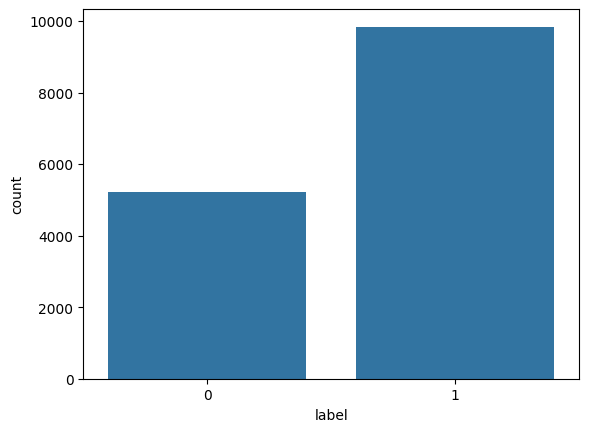

In [119]:
sns.countplot(data=df, x='label')
#Data is skewed- more male samples than female

In [120]:
df['label'].value_counts(normalize=True) * 100

,proportion
label,
1,65.301924
0,34.698076


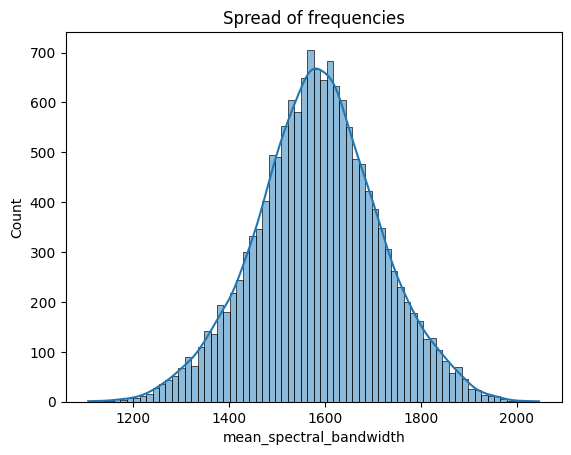

In [121]:
sns.histplot(data=df, x='mean_spectral_bandwidth', kde=True)
plt.title("Spread of frequencies")
plt.show()

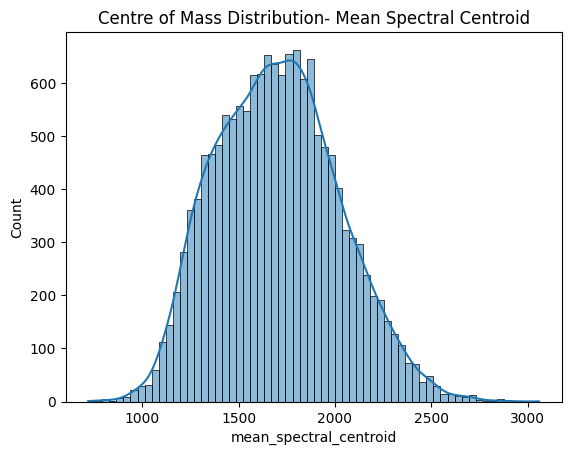

In [122]:
sns.histplot(data=df, x='mean_spectral_centroid', kde=True)
plt.title("Centre of Mass Distribution- Mean Spectral Centroid")
plt.show()

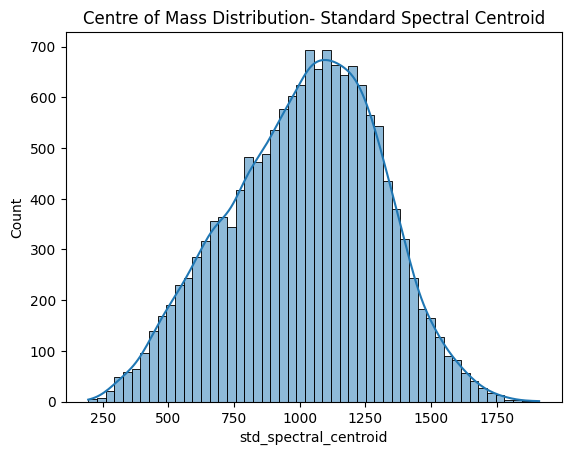

In [123]:
sns.histplot(data=df, x='std_spectral_centroid', kde=True)
plt.title("Centre of Mass Distribution- Standard Spectral Centroid")
plt.show()

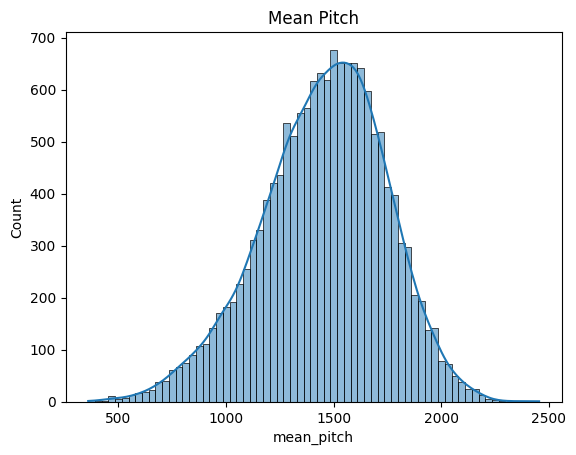

In [124]:
sns.histplot(data=df, x='mean_pitch', kde=True)
plt.title("Mean Pitch")
plt.show()
#No strong clustering probability based on pitch
#Most pitches overlap
#Balanced mix of speech styles between the two genders
#centred around an (almost) normal distribution
#Average frequency is around

Text(0.5, 1.0, 'Skew of Spectral Distribution')

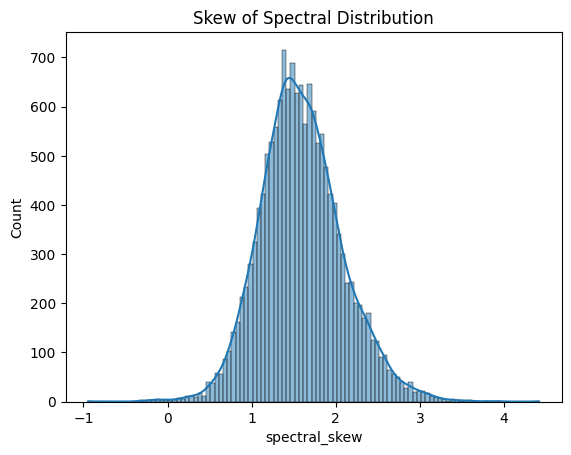

In [125]:
sns.histplot(data=df, x='spectral_skew', kde=True)
plt.title("Skew of Spectral Distribution")
#measures asymmetry of frequency spectrum
#spectrum currently is not elaning towards an yparticular frequence\
#i.e it not left-heavy or right-heavy(low/high freq respectively)


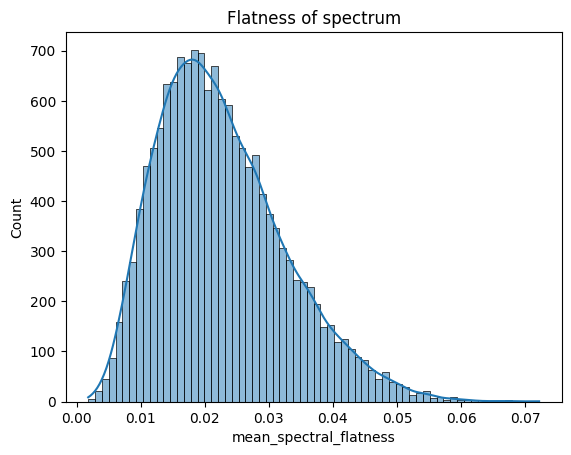

In [126]:
sns.histplot(data=df, x='mean_spectral_flatness', kde=True)
plt.title("Flatness of spectrum")
plt.show()
#signal is more tona (clear pitch) as the graph is skewed towards 0
#right skewed would indicate more noise
#In speech, males often have slightly lower spectral flatness than females due to harmonic structure, but it’s subtle — that’s why ML models look at this together with other features.

Boxplots for Outlier Analysis

<Axes: ylabel='mfcc_13_std'>

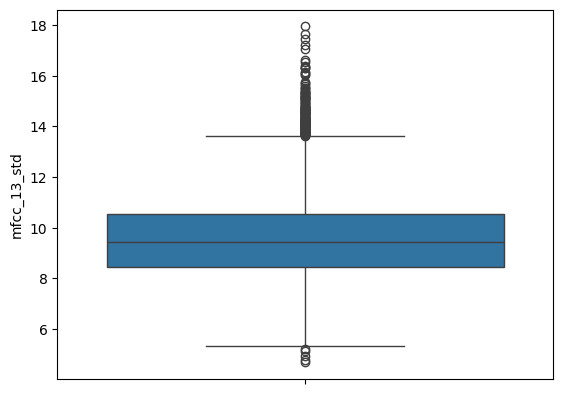

In [127]:
sns.boxplot(y='mfcc_13_std',data=df)

<Axes: ylabel='mfcc_13_mean'>

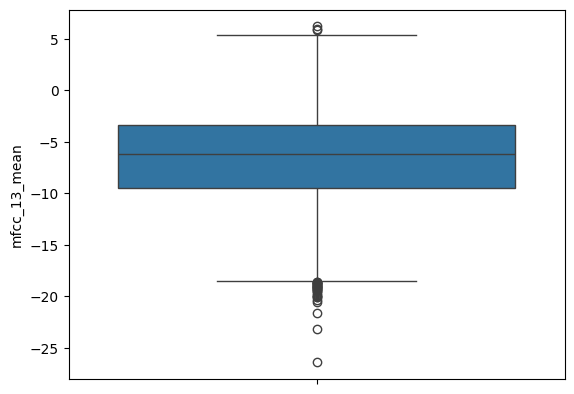

In [128]:
sns.boxplot(y='mfcc_13_mean',data=df)

In [129]:
df.columns

Index(['mean_spectral_centroid', 'std_spectral_centroid',
       'mean_spectral_bandwidth', 'std_spectral_bandwidth',
       'mean_spectral_contrast', 'mean_spectral_flatness',
       'mean_spectral_rolloff', 'zero_crossing_rate', 'rms_energy',
       'mean_pitch', 'min_pitch', 'max_pitch', 'std_pitch', 'spectral_skew',
       'spectral_kurtosis', 'energy_entropy', 'log_energy', 'mfcc_1_mean',
       'mfcc_1_std', 'mfcc_2_mean', 'mfcc_2_std', 'mfcc_3_mean', 'mfcc_3_std',
       'mfcc_4_mean', 'mfcc_4_std', 'mfcc_5_mean', 'mfcc_5_std', 'mfcc_6_mean',
       'mfcc_6_std', 'mfcc_7_mean', 'mfcc_7_std', 'mfcc_8_mean', 'mfcc_8_std',
       'mfcc_9_mean', 'mfcc_9_std', 'mfcc_10_mean', 'mfcc_10_std',
       'mfcc_11_mean', 'mfcc_11_std', 'mfcc_12_mean', 'mfcc_12_std',
       'mfcc_13_mean', 'mfcc_13_std', 'label'],
      dtype='object')

Bivariate Analysis

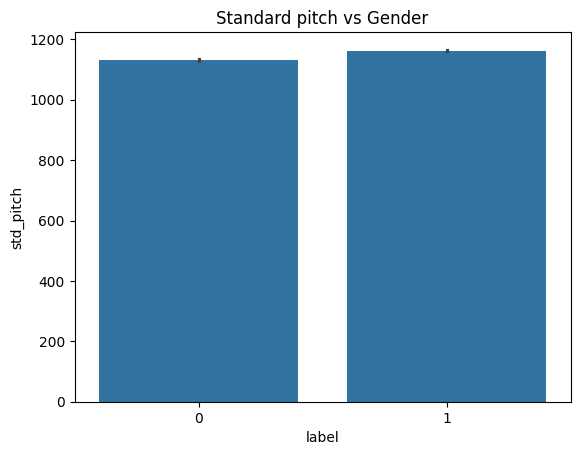

In [130]:
#Target vs Feature- Bivariate Analysis
#Satndard pitch vs gender
sns.barplot(x='label',y='std_pitch',data=df)
plt.title("Standard pitch vs Gender")
plt.show()

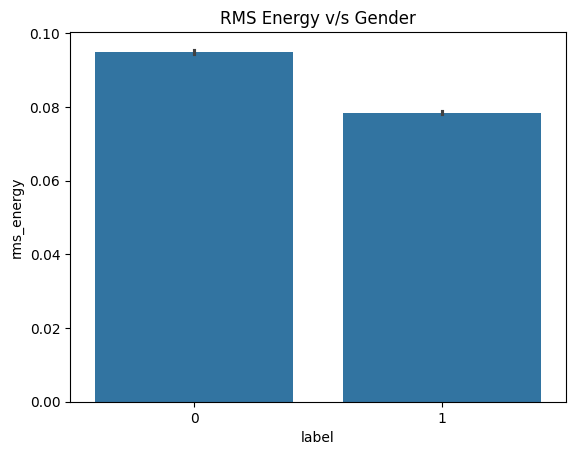

In [131]:
#Standard RMS Energy vs gender
sns.barplot(data=df, x='label',y='rms_energy')
plt.title("RMS Energy v/s Gender")
plt.show()

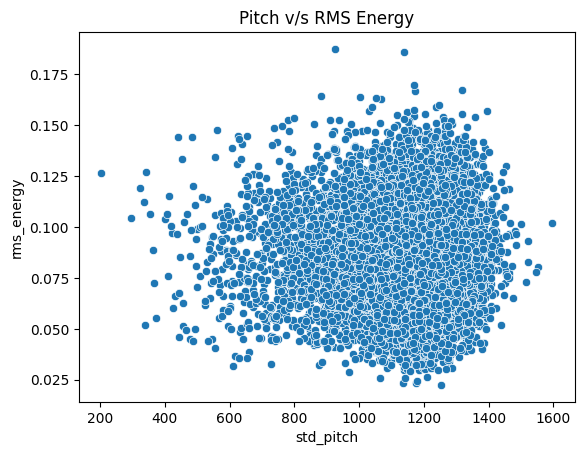

In [132]:
#Pitch vs rms energy
sns.scatterplot(data=df, x='std_pitch',y='rms_energy')
plt.title("Pitch v/s RMS Energy")
plt.show()
# pitch variability and loudness are mostly independent

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


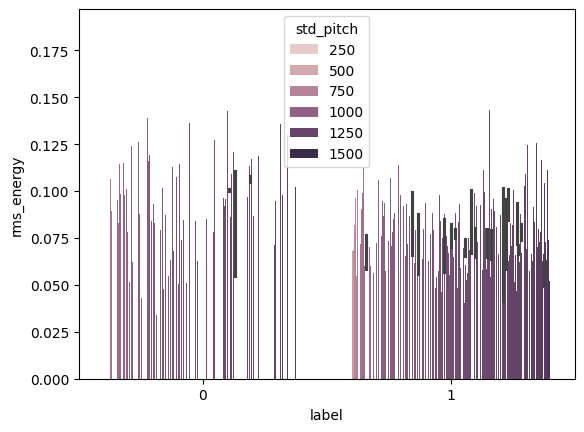

In [133]:
sns.barplot(data=df,x='label',y='rms_energy', hue='std_pitch')
plt.show()

Multivariate Analysis

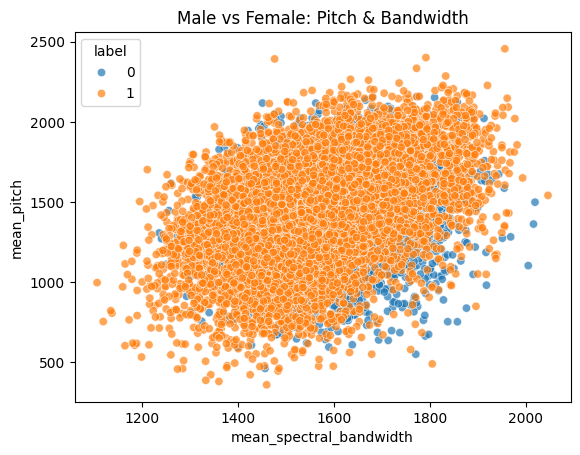

In [134]:
#Do amel and female voices differ in both pitch and spectral bandwisth simulataneouly
sns.scatterplot(data=df, x='mean_spectral_bandwidth', y='mean_pitch', hue='label',
                alpha=0.7)
plt.title("Male vs Female: Pitch & Bandwidth")
plt.show()
#the answer is no

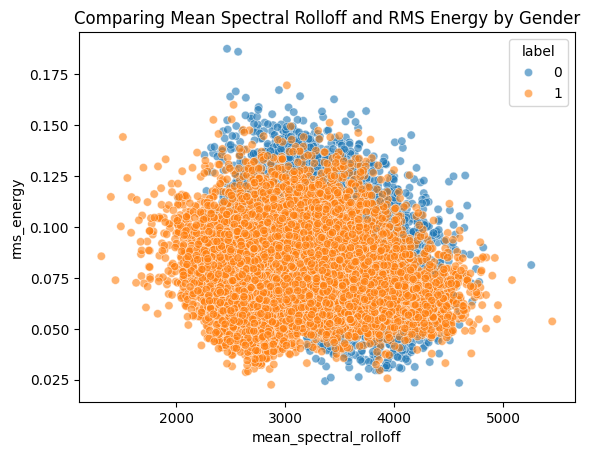

In [135]:
sns.scatterplot(data=df, x='mean_spectral_rolloff',y='rms_energy', hue='label', alpha=0.6)
plt.title("Comparing Mean Spectral Rolloff and RMS Energy by Gender")
plt.show()

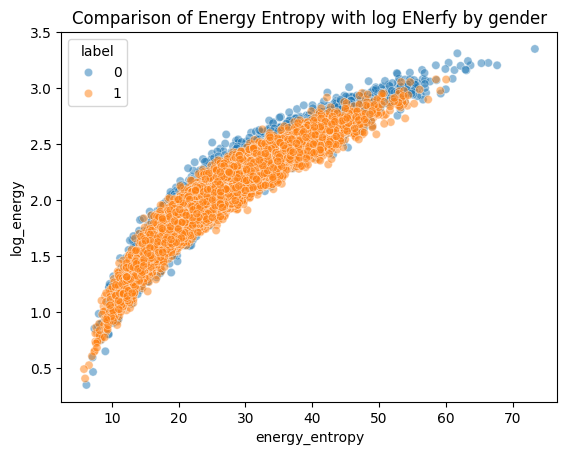

In [136]:
sns.scatterplot(data=df, x='energy_entropy',y='log_energy', hue='label',alpha=0.5)
plt.title("Comparison of Energy Entropy with log ENerfy by gender")
plt.show()

In [137]:
#Can't perform manova test as clusters are not lienarly sperable

<Axes: xlabel='mean_pitch', ylabel='mean_spectral_bandwidth'>

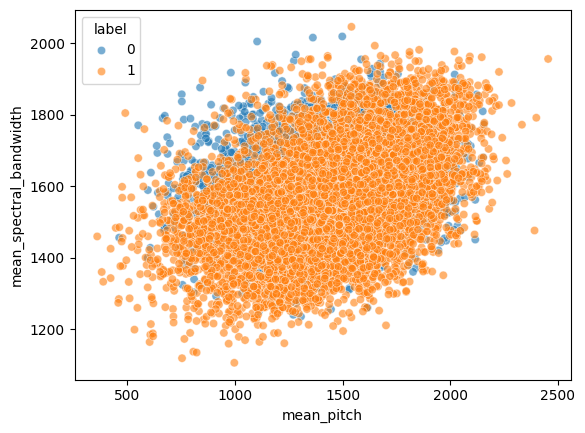

In [138]:
sns.scatterplot(data=df, x='mean_pitch', y='mean_spectral_bandwidth', hue='label', alpha=0.6)


Correlation Analysis

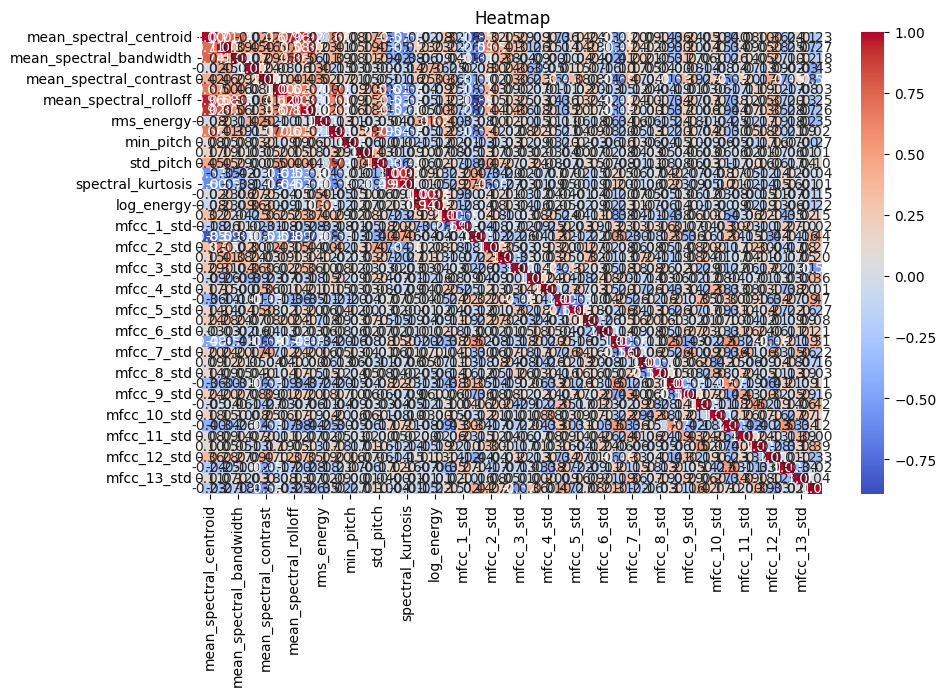

In [139]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt='.2f',cmap='coolwarm')
plt.title('Heatmap')
plt.show()

In [140]:
y=df['label']
x=df.drop('label', axis=1)

In [141]:
df['label'].value_counts()

,count
label,
1,9841
0,5229


In [142]:
x_train, x_test, y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=65)


In [143]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((12056, 43), (3014, 43), (12056,), (3014,))

In [144]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.fit_transform(x_test)

In [145]:
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [146]:
lr=LogisticRegression(max_iter=1000)
lr.fit(x_train_scaled, y_train)
lr_pred=lr.predict(x_test_scaled)

In [147]:
print("Logistic Regression Classifier\nAccuracy Score:", accuracy_score(y_test, lr_pred))
print("Precision Score:", precision_score(y_test, lr_pred))
print("Recall Score:", recall_score(y_test, lr_pred))
print("F1 Score:", f1_score(y_test, lr_pred))


Logistic Regression Classifier
Accuracy Score: 0.9940278699402787
Precision Score: 0.9964929859719439
Recall Score: 0.9945
F1 Score: 0.9954954954954955


In [148]:
lr_prob=lr.predict_proba(x_test_scaled)[:,1]
auc_score=roc_auc_score(y_test,lr_prob)
print(f"AUC-ROC (Logistic Regression): {auc_score:.4f}")



AUC-ROC (Logistic Regression): 0.9998


In [149]:
from sklearn.svm import SVC
svm=SVC(probability=True)
svm.fit(x_train_scaled, y_train)
svm_pred=svm.predict(x_test_scaled)

In [150]:
print("SVM Classifier \nAccuracy Score:", accuracy_score(y_test, svm_pred))
print("Precision Score:", precision_score(y_test, svm_pred))
print("Recall Score:", recall_score(y_test, svm_pred))
print("F1 Score:", f1_score(y_test, svm_pred))

SVM Classifier 
Accuracy Score: 0.9996682149966821
Precision Score: 0.9995002498750625
Recall Score: 1.0
F1 Score: 0.9997500624843789


In [151]:
svm_prob=svm.predict_proba(x_test_scaled)[:,1]
auc_svm=roc_auc_score(y_test,svm_prob)
print(f"AUC-ROC (SVM Classifier): {auc_svm:.4f}")


AUC-ROC (SVM Classifier): 1.0000


In [152]:
print("SVM Classification Report:\n",classification_report(y_test, svm_pred))

SVM Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1014
           1       1.00      1.00      1.00      2000

    accuracy                           1.00      3014
   macro avg       1.00      1.00      1.00      3014
weighted avg       1.00      1.00      1.00      3014



In [153]:
from sklearn.neighbors import KNeighborsClassifier
knc=KNeighborsClassifier()
knc.fit(x_train_scaled,y_train)
knc_pred=knc.predict(x_test_scaled)

In [154]:
print("KNeighbors Classifier\nAccuracy Score:", accuracy_score(y_test, knc_pred))
print("Precision Score:", precision_score(y_test, knc_pred))
print("Recall Score:", recall_score(y_test, knc_pred))
print("F1 Score:", f1_score(y_test, knc_pred))

KNeighbors Classifier
Accuracy Score: 0.9990046449900465
Precision Score: 0.999000499750125
Recall Score: 0.9995
F1 Score: 0.9992501874531368


In [155]:
knn_prob=knc.predict_proba(x_test_scaled)[:,1]
knn_auc=roc_auc_score(y_test,knn_prob)
print(f"AUC-ROC (KN Classifier): {knn_auc:.4f}")


AUC-ROC (KN Classifier): 1.0000


In [156]:
print("KNeighbors Classifier ClassificationReport \n:", classification_report(y_test, knc_pred))


KNeighbors Classifier ClassificationReport 
:               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1014
           1       1.00      1.00      1.00      2000

    accuracy                           1.00      3014
   macro avg       1.00      1.00      1.00      3014
weighted avg       1.00      1.00      1.00      3014



In [157]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
rf=RandomForestClassifier()
rf.fit(x_train_scaled, y_train)
rf_pred=rf.predict(x_test_scaled)

In [158]:
print("Random Forest Classifier\nAccuracy Score:", accuracy_score(y_test, rf_pred))
print("Precision Score:", precision_score(y_test, rf_pred))
print("Recall Score:", recall_score(y_test, rf_pred))
print("F1 Score:", f1_score(y_test, rf_pred))

Random Forest Classifier
Accuracy Score: 0.9966821499668215
Precision Score: 0.996011964107677
Recall Score: 0.999
F1 Score: 0.9975037443834248


In [159]:
rf_prob=rf.predict_proba(x_test_scaled)[:,1]
auc_rf=roc_auc_score(y_test,rf_prob)
print(f"AUC-ROC (RF Classifier): {auc_rf:.4f}")


AUC-ROC (RF Classifier): 1.0000


In [160]:
print("Random Forest Classification Report:\n", classification_report(y_test, rf_pred))

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00      1014
           1       1.00      1.00      1.00      2000

    accuracy                           1.00      3014
   macro avg       1.00      1.00      1.00      3014
weighted avg       1.00      1.00      1.00      3014



In [161]:
gbc=GradientBoostingClassifier()
gbc.fit(x_train_scaled, y_train)
gbc_pred=gbc.predict(x_test_scaled)

In [162]:
print("GradientBoost Classifier\nAccuracy Score:", accuracy_score(y_test, gbc_pred))
print("Precision Score:", precision_score(y_test, gbc_pred))
print("Recall Score:", recall_score(y_test, gbc_pred))
print("F1 Score:", f1_score(y_test, gbc_pred))

GradientBoost Classifier
Accuracy Score: 0.9950232249502322
Precision Score: 0.9964982491245623
Recall Score: 0.996
F1 Score: 0.9962490622655664


In [163]:
gbc_prob=gbc.predict_proba(x_test_scaled)[:,1]
auc_gbc=roc_auc_score(y_test,gbc_prob)
print(f"AUC-ROC (GBC Classifier): {auc_gbc:.4f}")


AUC-ROC (GBC Classifier): 0.9999


In [164]:
print("Gradient Boosting Classification Report:\n", classification_report(y_test, rf_pred))

Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00      1014
           1       1.00      1.00      1.00      2000

    accuracy                           1.00      3014
   macro avg       1.00      1.00      1.00      3014
weighted avg       1.00      1.00      1.00      3014



In [165]:
#Do research of the given datset for eda
#streamlit app should take in values and give the computed result- i.e male/female voice based on ml

In [166]:
from xgboost import XGBClassifier

In [167]:
xgbc=XGBClassifier()
xgbc.fit(x_train_scaled, y_train)
xgbc_pred=xgbc.predict(x_test_scaled)

In [168]:
print("XGBoost Classifier\nAccuracy Score:", accuracy_score(y_test, xgbc_pred))
print("Precision Score:", precision_score(y_test, xgbc_pred))
print("Recall Score:", recall_score(y_test, xgbc_pred))
print("F1 Score:", f1_score(y_test, xgbc_pred))

XGBoost Classifier
Accuracy Score: 0.9983410749834107
Precision Score: 0.9989994997498749
Recall Score: 0.9985
F1 Score: 0.9987496874218554


In [169]:
xgbc_prob=xgbc.predict_proba(x_test_scaled)[:,1]
auc_score=roc_auc_score(y_test,xgbc_prob)
print(f"AUC-ROC (XGBC Classifier): {auc_score:.4f}")


AUC-ROC (XGBC Classifier): 1.0000


In [170]:
joblib.dump(xgbc,'xgbclass.pkl')


['xgbclass.pkl']

In [171]:
print("XGBoost Classifier Classification Report\n", classification_report(y_test,xgbc_pred) )

XGBoost Classifier Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1014
           1       1.00      1.00      1.00      2000

    accuracy                           1.00      3014
   macro avg       1.00      1.00      1.00      3014
weighted avg       1.00      1.00      1.00      3014



In [172]:
from sklearn.tree import DecisionTreeClassifier
dctc=DecisionTreeClassifier()
dctc.fit(x_train_scaled, y_train)
dctc_pred=dctc.predict(x_test_scaled)

In [173]:
print("DecisionTree Classifier\nAccuracy Score:", accuracy_score(y_test, dctc_pred))
print("Precision Score:", precision_score(y_test, dctc_pred))
print("Recall Score:", recall_score(y_test, dctc_pred))
print("F1 Score:", f1_score(y_test, dctc_pred))

DecisionTree Classifier
Accuracy Score: 0.960185799601858
Precision Score: 0.97
Recall Score: 0.97
F1 Score: 0.97


In [174]:
dctc_prob=dctc.predict_proba(x_test_scaled)[:,1]
auc_dctc=roc_auc_score(y_test,dctc_prob)
print(f"AUC-ROC (DCTC Classifier): {auc_dctc:.4f}")


AUC-ROC (DCTC Classifier): 0.9554


In [175]:
print("Decision Tree Classifier Classification Report: ", classification_report(y_test, dctc_pred))

Decision Tree Classifier Classification Report:                precision    recall  f1-score   support

           0       0.94      0.94      0.94      1014
           1       0.97      0.97      0.97      2000

    accuracy                           0.96      3014
   macro avg       0.96      0.96      0.96      3014
weighted avg       0.96      0.96      0.96      3014



In [176]:
from sklearn.cluster import KMeans,DBSCAN
from sklearn.metrics import silhouette_score


In [177]:
x_scaled=scaler.fit_transform(x)


In [178]:
x_scaled.shape

(15070, 43)

In [179]:
kmeans=KMeans(n_clusters=2,random_state=42)
kmeans_labels=kmeans.fit_predict(x_scaled)
kmeans_silhouette= silhouette_score(x_scaled, kmeans_labels)

In [180]:
print("K Means Silhouette Score: ", kmeans_silhouette)

K Means Silhouette Score:  0.1745264670426607


In [181]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
x_pca=pca.fit_transform(x_scaled)


In [182]:
dbscan=DBSCAN(eps=2.5,min_samples=20)
dbscan_labels=dbscan.fit_predict(x_pca)
if len(set(dbscan_labels))>1:
    dbscan_silhouette=silhouette_score(x_pca,dbscan_labels)
else:
    dbscan_silhouette=-1

In [183]:
print(f"DBSCAN Silhouette Score: {dbscan_silhouette:.4f}")

DBSCAN Silhouette Score: 0.5837


Clustering sans label is not very clear

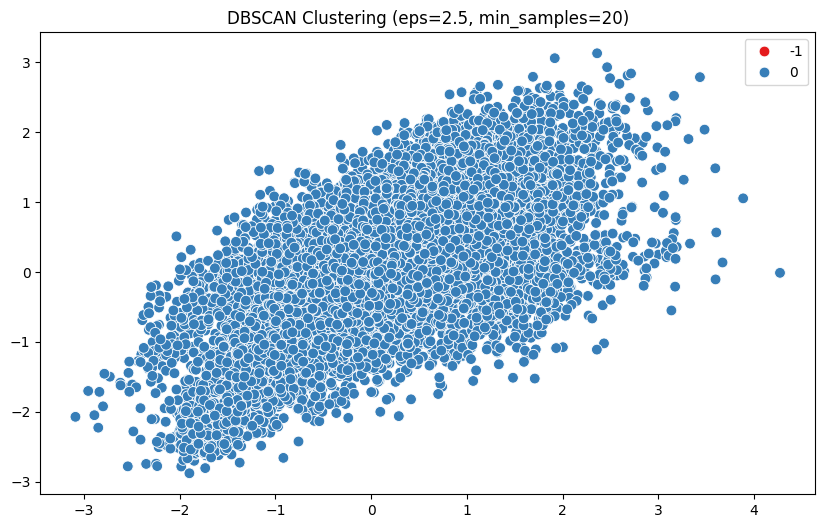

In [184]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=x_scaled[:,0], y=x_scaled[:,1], hue=dbscan_labels, palette='Set1', s=60)
plt.title(f"DBSCAN Clustering (eps=2.5, min_samples=20)")
plt.show()

In [185]:
df.head()

,mean_spectral_centroid,std_spectral_centroid,mean_spectral_bandwidth,std_spectral_bandwidth,mean_spectral_contrast,mean_spectral_flatness,mean_spectral_rolloff,zero_crossing_rate,rms_energy,mean_pitch,...,mfcc_9_std,mfcc_10_mean,mfcc_10_std,mfcc_11_mean,mfcc_11_std,mfcc_12_mean,mfcc_12_std,mfcc_13_mean,mfcc_13_std,label
0,2247.331739,1158.537748,1870.415462,370.405241,21.440710,0.036879,4419.438073,0.169241,0.082552,1592.1033,...,21.736240,2.303085,8.983318,-17.410305,9.115154,0.301804,10.452693,-3.080832,10.146248,0
1,1790.719889,996.554825,1757.898617,410.710318,21.513383,0.018936,3635.742188,0.108068,0.055477,1112.6351,...,13.937135,-0.953942,10.831742,-0.088775,10.297690,-7.281142,10.926579,-0.450248,8.489134,0
2,1977.923363,1010.148667,1747.099555,461.458379,20.476283,0.032616,3873.291016,0.144633,0.060388,1557.5225,...,14.900779,0.260098,14.031009,-0.420670,10.810292,-0.199829,11.986182,3.372986,9.285437,0
3,2037.765550,1311.440630,1745.224852,419.056484,19.516014,0.028482,3826.584507,0.148933,0.029559,1481.0868,...,15.957924,-1.486122,14.461978,-8.479608,12.550333,3.997028,9.912608,-6.946966,10.574301,0
4,1739.383829,1092.623322,1623.135563,450.088465,20.260620,0.025737,3452.903892,0.117961,0.069078,1424.5352,...,15.105562,-3.366364,13.943447,-6.561539,11.944948,1.410639,13.110976,-3.252258,9.866687,0


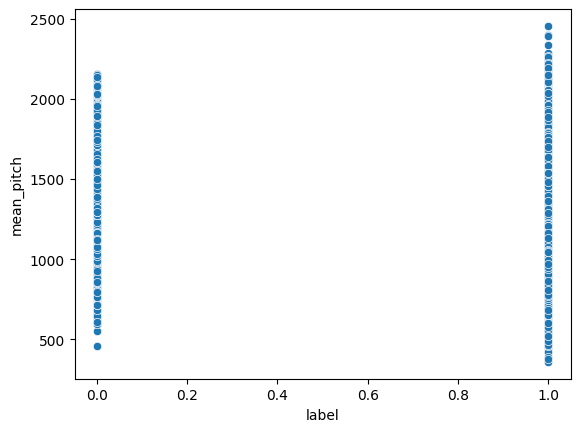

In [186]:
sns.scatterplot(data = df, x = 'label', y = 'mean_pitch')
plt.show()

In [187]:
#ANN
from tensorflow.keras import layers, models
ann=models.Sequential([
    layers.Dense(64,activation='relu', input_shape=(x_train_scaled.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1,activation='sigmoid')
])
ann.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy']
)

history=ann.fit(x_train_scaled, y_train,
                  validation_split=0.2,
                  epochs=10,
                  batch_size=32,
                  verbose=1)
ann_pred=((ann).predict(x_test_scaled)>=0.5).astype(int)
print(classification_report(y_test,ann_pred))



Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


302/302 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9205 - loss: 0.2193 - val_accuracy: 0.9975 - val_loss: 0.0145
Epoch 2/10
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9971 - loss: 0.0119 - val_accuracy: 0.9983 - val_loss: 0.0070
Epoch 3/10
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9986 - loss: 0.0054 - val_accuracy: 0.9979 - val_loss: 0.0057
Epoch 4/10
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9998 - loss: 0.0020 - val_accuracy: 0.9988 - val_loss: 0.0045
Epoch 5/10
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 0.0010 - val_accuracy: 0.9988 - val_loss: 0.0034
Epoch 6/10
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 5.3461e-04 - val_accuracy: 0.9992 - val_loss: 0.0031
Epoch 7/10
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 3.4430e-04 - val_accuracy: 0.9992 - val_loss: 0.0026
Epoch 8/10
302/302 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 1.0000 - loss: 2.6554e-04 - val_accuracy: 0

In [188]:
acc_ann = accuracy_score(y_test, ann_pred)

# Precision, Recall, F1
prec_ann = precision_score(y_test, ann_pred)
recall_ann = recall_score(y_test, ann_pred)
f1_ann = f1_score(y_test, ann_pred)

# Confusion Matrix
cm_ann = confusion_matrix(y_test, ann_pred)

# ROC-AUC
ann_prob = ann.predict(x_test_scaled)[:, 0]
roc_auc_ann = roc_auc_score(y_test, ann_prob)

# Print results
print(f"Accuracy: {acc_ann:.4f}")
print(f"Precision: {prec_ann:.4f}")
print(f"Recall: {recall_ann:.4f}")
print(f"F1 Score: {f1_ann:.4f}")
print("Confusion Matrix:")
print(cm_ann)
print(f"ROC-AUC: {roc_auc_ann:.4f}")

95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Accuracy: 0.9997
Precision: 0.9995
Recall: 1.0000
F1 Score: 0.9998
Confusion Matrix:
[[1013    1]
 [   0 2000]]
ROC-AUC: 1.0000


In [189]:
ann.save('ann_model.h5')
print("model saved successfully")


model saved successfully


In [190]:
%%writefile humanvoiceclass.py
import streamlit as st
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import pickle

# Reading CSV file
df = pd.read_csv(r'/content/sample_data/vocal_gender_features_new.csv')

st.set_page_config(page_title="Human Voice Identifier", layout='wide')
st.sidebar.title("Navigation")

page = st.sidebar.radio('Go to', ['Introduction', 'Data Overview', 'EDA', 'Classifier'])

if page == 'Introduction':
    st.title("Introduction")
    st.image('/content/sample_data/hvc1.png')
    st.markdown("""
    ## 🎤 Human Voice Classification and Clustering

A machine learning-based application that classifies and clusters human voice samples based on extracted audio features. The system supports gender classification (Male/Female) using traditional ML models and is deployed with an interactive **Streamlit** interface for live predictions.

---

## 📌 Project Overview

This project aims to process human voice audio features to build robust **classification** and **clustering** models. It includes:

- Data preprocessing and cleaning
- Exploratory Data Analysis (EDA)
- Multiple ML model training (Logistic Regression, SVM, Random Forest, etc.)
- Clustering using K-Means and DBSCAN
- Evaluation using standard metrics
- Deployment using **Streamlit**

---

## 🧠 Problem Statement

> **Goal**: To classify gender (Male/Female) and cluster similar voice patterns using extracted voice features.

Voice-based classification and clustering can help:
- Identify speakers based on their voice profiles
- Assist in speech analytics
- Improve accessibility tools
- Power call center analytics

---

## 📂 Dataset Description

Dataset: `vocal_gender_features_new.csv`

Features:
- Spectral features (e.g., centroid, bandwidth, contrast, rolloff)
- Energy and pitch (mean, min, max, std)
- MFCCs (Mel-Frequency Cepstral Coefficients): `mfcc_1_mean` to `mfcc_13_std`
- Target variable: `label` → `0: Female`, `1: Male`

---

## 🛠️ Tech Stack

- **Python**
- **Pandas**, **NumPy**, **Matplotlib**, **Seaborn**
- **Scikit-learn**
- **XGBoost**
- **Streamlit**

---

## 📈 ML Models Used

**Classification Models:**
- Logistic Regression
- Support Vector Machine (SVM)
- Random Forest
- Decision Tree
- Gradient Boosting Classifier
- K-Nearest Neighbors (KNN)
- XGBoost

**Clustering Techniques:**
- K-Means Clustering
- DBSCAN

**Neural Network**
- Artificial neural networks(ANN)

---

## 🧪 Evaluation Metrics

**For Classification:**
- Accuracy
- Precision
- Recall
- AUCROC

**For Clustering:**
- Silhouette Score


---

## 🔍 Exploratory Data Analysis (EDA)

Performed EDA to explore:
- Feature distributions
- Class imbalances
- Correlations
- Box plots for outliers
- Relationships between pitch, MFCCs, and gender

---


## 💻 Streamlit Web App

The app allows users to:
- View dataset
- Explore data through EDA
- Input extracted voice features manually
- Get gender predictions in real-time

📌 Features:
- Sidebar navigation (Introduction, Data Overview, EDA, App)
- Float inputs for all 43 audio features
- Streamlit-based UI for prediction

📦 Files:
- `humanvoiceclass.py`: Main Streamlit app
- `model.pkl`: Trained ML model (e.g., XGBoost)
- `scaler.pkl`: StandardScaler for preprocessing
- `vocal_gender_features_new.csv`: Dataset used

---

## 🚀 Getting Started

### 🔧 Installation

```bash
pip install -r requirements.txt

## 📝 Conclusion

This project demonstrates how an end-toend machin learning task can be carried out for an audio-based dataset.\
It also helps us understand how various classifciation models and clustering models work, if and when they are applied.
    """)

# Data Overview Page
elif page == 'Data Overview':
    st.title('Data Overview')
    st.image('/content/sample_data/hvc2.png')
    st.dataframe(df)

elif page == 'EDA':
    st.title("Exploratory Data Analysis")
    st.image('/content/sample_data/hvc2.png')

    st.markdown("""
    Explore the dataset through various **Univariate**, **Bivariate**, and **Multivariate** plots.
    Select a question from the dropdown to visualize the answer.
    """)

    # Dropdown menu options
    eda_options = {
        "Class distribution – Is the dataset balanced?": "class_dist",
        "Distribution of Mean Spectral Bandwidth": "mean_spectral_bandwidth",
        "Distribution of Mean Spectral Centroid": "mean_spectral_centroid",
        "Distribution of Std. Spectral Centroid": "std_spectral_centroid",
        "Distribution of Mean Pitch": "mean_pitch",
        "Distribution of Spectral Skew": "spectral_skew",
        "Distribution of Spectral Flatness": "mean_spectral_flatness",
        "Outlier Analysis (MFCC 13 std)": "mfcc_13_std",
        "Outlier Analysis (MFCC 13 mean)": "mfcc_13_mean",
        "Std Pitch vs Gender": "std_pitch_vs_label",
        "RMS Energy vs Gender": "rms_energy_vs_label",
        "Pitch vs RMS Energy": "pitch_vs_rms",
        "Pitch Variability and Loudness Independence": "pitch_variability_loudness",
        "Pitch & Bandwidth comparison by Gender": "pitch_bandwidth_gender",
        "Mean Spectral Rolloff vs RMS Energy": "rolloff_vs_rms",
        "Energy Entropy vs Log Energy": "entropy_vs_log",
        "Correlation Heatmap": "correlation_heatmap"
    }

    choice = st.selectbox("Select an EDA question to explore:", list(eda_options.keys()))

    # Plot logic
    plt.style.use("seaborn-v0_8-whitegrid")

    if eda_options[choice] == "class_dist":
        fig, ax = plt.subplots()
        sns.countplot(data=df, x='label', ax=ax)
        st.write("More male samples than female → dataset is skewed.")
        st.write(df['label'].value_counts(normalize=True) * 100)
        st.pyplot(fig)

    elif eda_options[choice] == "mean_spectral_bandwidth":
        fig, ax = plt.subplots()
        sns.histplot(data=df, x='mean_spectral_bandwidth', kde=True, ax=ax)
        ax.set_title("Spread of Frequencies")
        st.pyplot(fig)

    elif eda_options[choice] == "mean_spectral_centroid":
        fig, ax = plt.subplots()
        sns.histplot(data=df, x='mean_spectral_centroid', kde=True, ax=ax)
        ax.set_title("Centre of Mass Distribution - Mean Spectral Centroid")
        st.pyplot(fig)

    elif eda_options[choice] == "std_spectral_centroid":
        fig, ax = plt.subplots()
        sns.histplot(data=df, x='std_spectral_centroid', kde=True, ax=ax)
        ax.set_title("Centre of Mass Distribution - Std Spectral Centroid")
        st.pyplot(fig)

    elif eda_options[choice] == "mean_pitch":
        fig, ax = plt.subplots()
        sns.histplot(data=df, x='mean_pitch', kde=True, ax=ax)
        ax.set_title("Mean Pitch")
        st.write("No strong clustering based on pitch — most pitches overlap.")
        st.pyplot(fig)

    elif eda_options[choice] == "spectral_skew":
        fig, ax = plt.subplots()
        sns.histplot(data=df, x='spectral_skew', kde=True, ax=ax)
        ax.set_title("Skew of Spectral Distribution")
        st.write("Measures asymmetry of frequency spectrum. Currently not skewed towards low/high frequencies.")
        st.pyplot(fig)

    elif eda_options[choice] == "mean_spectral_flatness":
        fig, ax = plt.subplots()
        sns.histplot(data=df, x='mean_spectral_flatness', kde=True, ax=ax)
        ax.set_title("Flatness of Spectrum")
        st.write("Skewed towards 0 → more tonal (clear pitch). Right skew would indicate more noise.")
        st.pyplot(fig)

    elif eda_options[choice] == "mfcc_13_std":
        fig, ax = plt.subplots()
        sns.boxplot(y='mfcc_13_std', data=df, ax=ax)
        ax.set_title("Outlier Analysis: MFCC 13 Std")
        st.pyplot(fig)

    elif eda_options[choice] == "mfcc_13_mean":
        fig, ax = plt.subplots()
        sns.boxplot(y='mfcc_13_mean', data=df, ax=ax)
        ax.set_title("Outlier Analysis: MFCC 13 Mean")
        st.pyplot(fig)

    elif eda_options[choice] == "std_pitch_vs_label":
        fig, ax = plt.subplots()
        sns.barplot(x='label', y='std_pitch', data=df, ax=ax)
        ax.set_title("Standard Pitch vs Gender")
        st.pyplot(fig)

    elif eda_options[choice] == "rms_energy_vs_label":
        fig, ax = plt.subplots()
        sns.barplot(x='label', y='rms_energy', data=df, ax=ax)
        ax.set_title("RMS Energy vs Gender")
        st.pyplot(fig)

    elif eda_options[choice] == "pitch_vs_rms":
        fig, ax = plt.subplots()
        sns.scatterplot(data=df, x='std_pitch', y='rms_energy', ax=ax)
        ax.set_title("Pitch vs RMS Energy")
        st.write("Pitch variability and loudness are mostly independent.")
        st.pyplot(fig)

    elif eda_options[choice] == "pitch_variability_loudness":
        fig, ax = plt.subplots()
        sns.barplot(data=df, x='label', y='rms_energy', hue='std_pitch', ax=ax)
        ax.set_title("Pitch Variability & Loudness Independence")
        st.pyplot(fig)

    elif eda_options[choice] == "pitch_bandwidth_gender":
        fig, ax = plt.subplots()
        sns.scatterplot(data=df, x='mean_spectral_bandwidth', y='mean_pitch', hue='label', alpha=0.7, ax=ax)
        ax.set_title("Male vs Female: Pitch & Bandwidth")
        st.write("Male and female voices do not differ significantly in both pitch and bandwidth simultaneously.")
        st.pyplot(fig)

    elif eda_options[choice] == "rolloff_vs_rms":
        fig, ax = plt.subplots()
        sns.scatterplot(data=df, x='mean_spectral_rolloff', y='rms_energy', hue='label', alpha=0.6, ax=ax)
        ax.set_title("Mean Spectral Rolloff vs RMS Energy")
        st.pyplot(fig)

    elif eda_options[choice] == "entropy_vs_log":
        fig, ax = plt.subplots()
        sns.scatterplot(data=df, x='energy_entropy', y='log_energy', hue='label', alpha=0.5, ax=ax)
        ax.set_title("Energy Entropy vs Log Energy by Gender")
        st.pyplot(fig)

    elif eda_options[choice] == "correlation_heatmap":
        fig, ax = plt.subplots(figsize=(10, 6))
        sns.heatmap(df.corr(numeric_only=True), annot=True, fmt='.2f', cmap='coolwarm', ax=ax)
        ax.set_title("Correlation Heatmap")
        st.pyplot(fig)

elif page == 'Classifier':
    st.title("Human Voice Classifier")
    st.image('/content/sample_data/hvc4.png')

    import joblib
    model=joblib.load('xgbclass.pkl')
    scaler = joblib.load('scaler.pkl')

    # Feature names used during model training
    feature_names=[ 'mean_spectral_centroid','std_spectral_centroid','mean_spectral_bandwidth','std_spectral_bandwidth',\
        'mean_spectral_contrast','mean_spectral_flatness','mean_spectral_rolloff','zero_crossing_rate','rms_energy',\
            'mean_pitch','min_pitch','max_pitch','std_pitch','spectral_skew','spectral_kurtosis','energy_entropy','log_energy',]\
            +[f'mfcc_{i}_mean'for i in range(1,14)]+[f'mfcc_{i}_std' for i in range(1,14)]
    st.markdown("Please input audio feature values to classify as male or female:")

    inputs=[]
    for name in feature_names:
        value=st.number_input(f"{name}", value=0.0, format="%.4f")
        inputs.append(value)

    if st.button("Predict Gender"):
        input_array=np.array(inputs).reshape(1,-1)
        input_scaled=scaler.transform(input_array)
        prediction=model.predict(input_scaled)[0]

        if prediction==1:
            st.success("Predicted Gender: **MALE**")
        else:
            st.success("Predicted Gender: **FEMALE**")


Overwriting humanvoiceclass.py


In [191]:
!pip install streamlit

In [192]:
!streamlit run humanvoiceclass.py




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8502
  Network URL: http://172.28.0.12:8502
  External URL: http://34.126.64.145:8502



  Stopping...
  Stopping...


In [193]:
#sadgurucharanaravindaarpanamastu

In [194]:
!pip install pyngrok -q
from pyngrok import ngrok
from google.colab import userdata

# Terminate open tunnels if any
ngrok.kill()

# Get a ngrok authtoken from https://dashboard.ngrok.com/auth
# and paste it in the secrets tab on the left sidebar.
# Then uncomment the following line:
NGrok_Auth = userdata.get('NGROK_AUTH_TOKEN')
ngrok.set_auth_token(NGrok_Auth)

# Open a tunnel to the port where Streamlit is running
public_url = ngrok.connect(8501)
print(f"Streamlit App URL: {public_url}")

Streamlit App URL: NgrokTunnel: "https://a0377e578aab.ngrok-free.app" -> "http://localhost:8501"


In [196]:
!streamlit run humanvoiceclass.py &>/dev/null&